# Black-Scholes Model Analysis

Initally setting up imports and magics for this project

In [9]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import pyplot for creating plots
from scipy.stats import norm  # Import norm for normal distribution functions, used in option pricing
import ipywidgets as widgets  # Import ipywidgets for interactive widgets in Jupyter
from IPython.display import display  # Import display to show widgets and outputs in Jupyter

# Local modules
from modelproject import BlackScholesModel  # Import the BlackScholesModel class from the modelproject module


## Model description: Black-Scholes

The Black-Scholes model is a cornerstone of modern financial theory, introduced by Fischer Black and Myron Scholes in 1973. It provides a mathematical model for pricing European-style options, which are financial derivatives allowing for the purchase or sale of an underlying asset at a predetermined price on a specific date. The model's significance lies in its ability to deduce a theoretical estimate of an option's price in the market, absent of any arbitrage opportunities (i.e., risk-free profit).

### Purpose of the Model

The primary purpose of the Black-Scholes model is to determine the price of options, specifically European call and put options, under the assumption of constant volatility and interest rates. By doing so, it helps traders, financial analysts, and investors to:

- **Evaluate Options:** Determine fair prices for options, which are otherwise difficult due to the option's dependency on future asset prices.
- **Risk Management:** Understand how different factors affect the option's value, aiding in the formulation of strategies to hedge against price movements of the underlying asset.
- **Investment Decision Making:** Make informed decisions regarding the purchase or sale of options based on their theoretical values.

### The Black-Scholes Formula

The Black-Scholes model for a European call option's price, $C$, and a European put option's price, $P$, on a non-dividend-paying stock is given by:

#### For a Call Option:
$$C(S, t) = S_0N(d_1) - Ke^{-rT}N(d_2)$$

#### For a Put Option:
$$P(S, t) = Ke^{-rT}N(-d_2) - S_0N(-d_1) $$

where:
- $S_0$ is the current price of the stock.
- $K$ is the strike price of the option.
- $r$ is the risk-free interest rate (annual).
- $T$ is the time to expiration of the option (in years).
- $N (\cdot)$ represents the cumulative distribution function of the standard normal distribution.
- $d_1$ and $d_2$ are calculated as follows:

$$d_1 = \frac{\ln(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}} $$

$$d_2 = d_1 - \sigma\sqrt{T} $$

- $\sigma$ is the volatility of the stock's returns (standard deviation of the stock's returns).

### Understanding the Equations

- **$S_0N(d_1)$** and **$-S_0N(-d_1)$**: These terms represent the present value of purchasing the stock outright, adjusted for the probability that the option finishes in the money (i.e., it has intrinsic value at expiration).
- **$Ke^{-rT}N(d_2)$** and **$Ke^{-rT}N(-d_2)$**: These terms account for the present value of paying the strike price at expiration, adjusted for the probability the option will be exercised.

The function $N(d_1)$ and $N(d_2)$ are probabilities derived from the cumulative distribution of a standard normal distribution, which account for the risk-adjusted probabilities that the option will be in the money at expiration.


The Black-Scholes model provides a systematic method to price European options. Its derivation assumes market efficiency, no arbitrage opportunities, and constant volatility and interest rates. While real-world conditions may deviate from these assumptions, the Black-Scholes model remains a fundamental tool in finance for theoretical valuation and risk management strategies.


## Analytical Solution

The Black-Scholes model offers an analytical solution for the valuation of European options. 

At the core of the Black-Scholes model are the formulas for European call and put options, encapsulating the relationship between an option's price and key financial variables:

- **Call Option Price**: 
  $$ C(S, t) = S_0N(d_1) - Ke^{-rT}N(d_2) $$
  
- **Put Option Price**: 
  $$ P(S, t) = Ke^{-rT}N(-d_2) - S_0N(-d_1) $$


Below is an example for the closed form solution for a call and put option with S=100, K=100, T=1, r=0.05, $\sigma$=0.2.

In [10]:
# Initialize the model with specific parameters
model = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2, dividend_yield=0)

# Calculate the call option price
call_price = model.call_price()
print(f"The price of the European call option is: {call_price}")

# Calculate the put option price
put_price = model.put_price()
print(f"The price of the European put option is: {put_price}")


The price of the European call option is: 10.450583572185565
The price of the European put option is: 5.573526022256971


Further examining the option prices for different strike prices and volatility, while holding the other parameters fixed: $S=100$, $T=1$ and $r=0.05$.

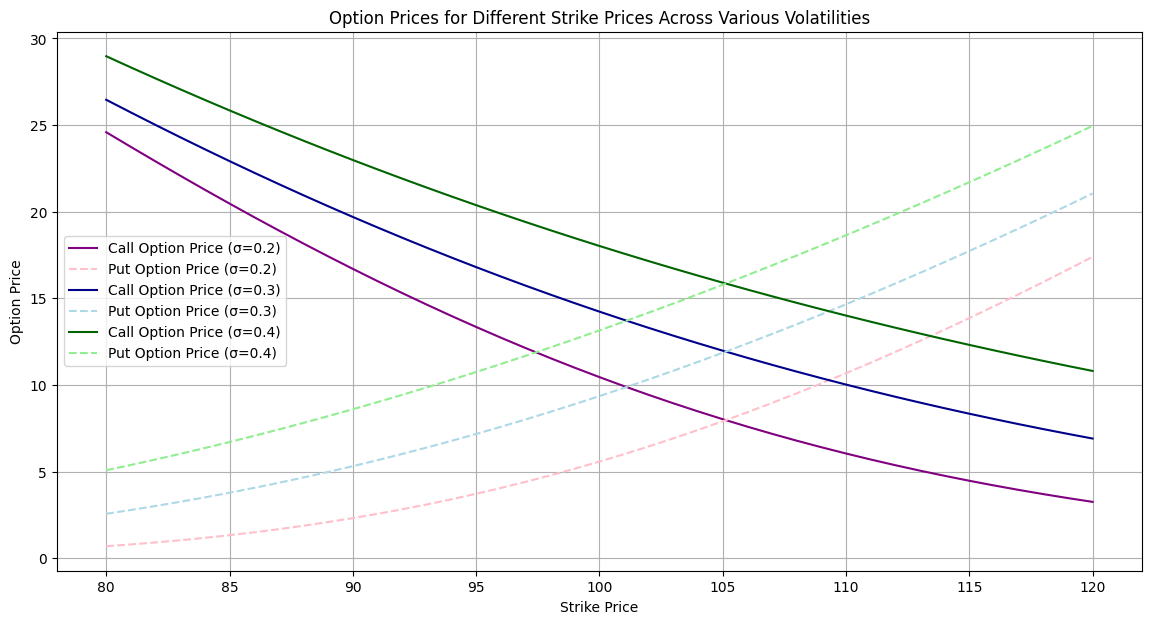

In [11]:
# Parameters
S = 100  # Current stock price
T = 1    # Time to expiration
r = 0.05 # Risk-free rate
volatilities = [0.2, 0.3, 0.4]  # Range of volatilities

# Colors for each volatility for calls and puts so they match
colors = {
    0.2: ('purple', 'pink'),
    0.3: ('darkblue', 'lightblue'),
    0.4: ('darkgreen', 'lightgreen')
}

# Range of strike prices
strike_prices = np.linspace(80, 120, 41)

# Plotting setup
plt.figure(figsize=(14, 7))

# Calculate and plot option prices for each volatility
for sigma in volatilities:
    call_prices =  [BlackScholesModel(S, K, T, r, sigma, dividend_yield=0).call_price() for K in strike_prices]
    put_prices = [BlackScholesModel(S, K, T, r, sigma,dividend_yield=0).put_price() for K in strike_prices]
    call_color, put_color = colors[sigma]
    plt.plot(strike_prices, call_prices, label=f'Call Option Price (σ={sigma})',color=call_color)
    plt.plot(strike_prices, put_prices, label=f'Put Option Price (σ={sigma})', color=put_color,linestyle='--')

# Adding chart title and labels
plt.title('Option Prices for Different Strike Prices Across Various Volatilities')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')

# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()

The chart illustrates a clear relationship between strike prices and option prices, alongside the impact of volatility. As expected, call option prices fall when the strike price goes up, since higher strike prices mean the option is less likely to yield a profit. Conversely, put option prices increase with the strike price because these options become more valuable when the underlying asset's price is expected to drop below the threshold.

The colors on the chart represent different levels of volatility, showing that with more uncertainty in the market (higher volatility), option prices are generally higher, reflecting the greater risk and expected payoff.


Below, an interactive plot allows you to vary the parameters and observe the dynamics in the analytical pricing of options. This tool helps demonstrate how different assumptions on the parameters can influence the calculated option prices in the Black-Scholes model.

In [12]:
# Interactive widgets and output setup

# Widget to adjust the current stock price
S_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Stock Price (S)')

# Widget to adjust the strike price of the option
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)')

# Widget to adjust the time to maturity of the option, in years
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity (T)')

# Widget to adjust the risk-free interest rate
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-free Rate (r)')

# Widget to adjust the volatility of the stock
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.4, step=0.01, description='Volatility (σ)')

# Dictionary of parameters for interactive output function
params = {
    'S': S_slider, 
    'K': K_slider, 
    'T': T_slider, 
    'r': r_slider, 
    'sigma': sigma_slider
}

# User Interface (UI) vertical box containing all sliders
ui = widgets.VBox([S_slider, K_slider, T_slider, r_slider, sigma_slider])

# Generate interactive output using the plot_option_prices function with the parameters from sliders
out = widgets.interactive_output(BlackScholesModel.plot_option_prices, params)

# Display the UI and output plot together
display(ui, out)


Output()

## Numerical Solution

### Binomial Tree Model for Option Pricing

After the analytical methods provided by the Black-Scholes formula, the binomial tree model offers a numerical approach to option pricing that can handle a variety of scenarios including varying volatility and American options which allow early exercise. The method was developed by Cox, Ross, and Rubinstein in 1979. It builds on the concept that option prices can be modeled as a discrete-time stochastic process, specifically through a binomial lattice (tree) for several time steps up to the expiration of the option.

#### The Concept of the Binomial Tree

The binomial tree model uses a lattice-based computational procedure where each node represents a possible price of the underlying asset at a given point in time. The tree is constructed from the expiration date backwards to the current date and involves two potential outcomes at each node: an up move or a down move. The asset price either increases by a factor of  $u$ or decreases by a factor of  $d$ at each step, where these factors are determined based on the volatility of the underlying asset and the time step size.

#### Key Parameters and Calculation

- **Up Factor (u)** and **Down Factor (d)**:
  $$ u = e^{\sigma \sqrt{\Delta t}} $$
  $$ d = \frac{1}{u} $$
  where  $\sigma$ is the volatility and $\Delta t$ is the time increment per step.

- **Risk-neutral Probability (p)**:
  $$ p = \frac{e^{r \Delta t} - d}{u - d} $$
  where $ r $ is the risk-free rate. This probability represents the expected value under the risk-neutral measure, which is a fundamental concept in financial mathematics that assumes investors are risk-neutral.

#### Process of the Model:

1. **Construction of the Binomial Tree**:
   - Start at $ T $, the expiration of the option, and compute potential prices at every node by multiplying the current asset price by $ u $ or $d$ repeatedly for each step towards the expiration.

2. **Calculation of Option Values at Expiration**:
   - For a call option, the value at each node at expiration is $\max(S_T - K, 0)$ where $ S_T $ is the stock price at node $T$ and $ K $ is the strike price.
   - For a put option, the value is $\max(K - S_T, 0)$.

3. **Backward Induction**:
   - Move backward through the tree from expiration to the present, calculating the option value at each node by discounting the expected value of the option in the next time step using the risk-free rate and the risk-neutral probabilities.

#### Advantages of the Binomial Tree Model:

The binomial tree model offers significant advantages in the pricing of options, particularly in its flexibility, adaptability, and intuitiveness. It is especially valuable for pricing American options, where early exercise may be optimal, due to its iterative, step-by-step approach that allows for decision making at each node. This flexibility enables the model to effectively adapt to different scenarios, such as varying volatility and changing interest rates over time, by adjusting the parameters at each node of the tree. Furthermore, the binomial tree provides a visual representation of possible future paths for the asset price, enhancing understanding of the dynamics involved in option pricing. These qualities make the binomial tree model a robust tool for financial analysts, complementing the analytical perspectives provided by models like the Black-Scholes.

Despite being more computationally intensive than the Black-Scholes model, the binomial tree model's ability to handle more complex scenarios makes it a valuable tool in the arsenal of financial analysts. The Black-Scholes model, providing a closed-form solution, complements the binomial tree by offering a quick benchmark for European options under constant parameters.

Below is the numerical solution for a call and put option with 1000 number of steps in the binomial tree. 

In [13]:
# Calculate the European call option price using the binomial tree method with 1000 time steps
bi_call = model.binomial_tree_option_price(N=1000, option_type='call')

# Calculate the European put option price using the binomial tree method with 1000 time steps
bi_put = model.binomial_tree_option_price(N=1000, option_type='put')

# Output the calculated Black-Scholes model call option price for comparison
print("Black-Scholes Call Price:", call_price)

# Output the calculated Black-Scholes model put option price for comparison
print("Black-Scholes Put Price:", put_price)

# Output the calculated binomial tree model call option price
print("Binomial Tree Call Price:", bi_call)

# Output the calculated binomial tree model put option price
print("Binomial Tree Put Price:", bi_put)

Black-Scholes Call Price: 10.450583572185565
Black-Scholes Put Price: 5.573526022256971
Binomial Tree Call Price: 10.448584103764572
Binomial Tree Put Price: 5.57152655383368


These results indicate a high degree of accuracy between the analytical (Black-Scholes) and numerical (binomial tree) methods in calculating option prices. The minor differences observed, with the binomial tree prices being slightly lower, can primarily be attributed to the inherent discretization in the binomial tree approach compared to the continuous nature of the Black-Scholes model. Such discrepancies are typically the result of rounding and the finite number of steps used in the binomial method. Overall, the close alignment of these values validates the effectiveness of both methodologies for option pricing under the given parameters.


The graph below is presented to visually demonstrate that the numerical solution closely mirrors the analytical results. It allows the reader to observe the consistent dynamics at play and provides an interactive means to adjust option parameters, offering immediate insight into the resultant changes and trends.

In [14]:
# Interactive widgets
S_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Stock Price (S)')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity (T)')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-free Rate (r)')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.4, step=0.01, description='Volatility (σ)')
K_range = np.linspace(80, 120, 41)  # Range of strike prices

# Callback function to update the plot based on widget values
def update_plot(S, T, r, sigma):
    model = BlackScholesModel(S=S, K=100, T=T, r=r, sigma=sigma, dividend_yield=0)
    model.plot_binomial_tree_prices(S, K=100, T=T, r=r, sigma=sigma, K_range=np.linspace(80, 120, 41))

# Set up the user interface
ui = widgets.VBox([S_slider, T_slider, r_slider, sigma_slider])

# Link the output to the callback function
out = widgets.interactive_output(update_plot, {'S': S_slider, 'T': T_slider, 'r': r_slider, 'sigma': sigma_slider})

# Display the user interface and output
display(ui, out)

Output()

## Further Research: Advancing into American Options

In the preceding sections, the focus was only on European options, for which the Black-Scholes model provides an analytical solution. However, it does not extend to American options, which allow for the flexibility of early exercise before maturity. This distinct characteristic of American options necessitates a shift from analytical methods to numerical techniques, such as the binomial tree model, to effectively capture their valuation.

### Addressing the Possibility of Early Exercise

American options introduce the strategic decision of when to exercise the option, a choice that is absent in European options. The valuation of American options is therefore more nuanced, as it must incorporate the potential benefit of exercising the option at any point prior to expiration. This is influenced by factors like expected price movements, dividend payouts, and prevailing interest rates.

### Enhancements to the Binomial Tree for American Options

- **Incorporating Dividends**: Dividends play a pivotal role in the decision to exercise early. When modeling American options, the binomial tree is adapted to account for dividend payments by adjusting the underlying asset price at each node to reflect the present value of expected dividends.

- **Optimal Exercise Decisions**: The methodology expands to include the evaluation of the immediate exercise value against the potential value of deferring the decision at every node, choosing the path that maximizes the option's worth.


### Including Dividends in Option Pricing Models

When incorporating dividends into option pricing models, they are typically introduced as an annual dividend yield. This method provides a straightforward way to adjust the underlying asset's expected returns, reflecting the periodic income generated from holding the asset. The annual rate approach simplifies calculations but may not always capture the specific timing of dividend payments, which can be crucial for accurate option valuation, particularly for American options where the timing of dividends can influence early exercise decisions.

#### Comparing Prices with Dividend Inclusion

Incorporating dividends into the pricing models generally lowers the price of call options and increases the price of put options. This effect stems from the expected drop in stock prices when dividends are paid out, as the asset value decreases by the dividend amount on the ex-dividend date. Here’s how dividends impact different types of options:

- **Call Options**: The value of a call option might decrease with dividends because the potential for upside on the stock decreases as dividends are paid out, reducing the likelihood that the option will end up in-the-money.
  
- **Put Options**: Conversely, put options generally increase in value with higher dividends. Since the stock price is expected to drop by the dividend amount, the probability that the put will be in-the-money increases.


### Analysis
Starting with a dividend yield set to zero.

In [15]:
# Initialize the model with no dividends and standard parameters.
model_american = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2, dividend_yield=0.0)

# Calculate the American call option price with 100 steps in the binomial tree.
american_call_price = model_american.binomial_tree_American_option_price(N=100, option_type='call')

# Calculate the American put option price with 100 steps in the binomial tree.
american_put_price = model_american.binomial_tree_American_option_price(N=100, option_type='put')

# Output the calculated Black-Scholes model call option price for comparison
print("Black-Scholes Call Price:", call_price)

# Output the calculated Black-Scholes model put option price for comparison
print("Black-Scholes Put Price:", put_price)

# Output the calculated binomial tree model call option price
print("Binomial Tree Call Price:", bi_call)

# Output the calculated binomial tree model put option price
print("Binomial Tree Put Price:", bi_put)

# Output the calculated American binomial tree model call option price
print("American Binomial Tree Call Price:", american_call_price)

# Output the calculated American binomial tree model put option price
print("American Binomial Tree Put Price:", american_put_price)

Black-Scholes Call Price: 10.450583572185565
Black-Scholes Put Price: 5.573526022256971
Binomial Tree Call Price: 10.448584103764572
Binomial Tree Put Price: 5.57152655383368
American Binomial Tree Call Price: 10.430611662249113
American Binomial Tree Put Price: 6.082354409142441


Without dividends, the valuation of American call options typically aligns closely with their European counterparts because early exercise is generally less beneficial. The potential growth in the underlying asset's value usually outweighs the immediate gains from early exercise, thanks to the time value of money. As a result, the optimal strategy for American call options is often to hold until expiration unless unusual market conditions prevail. This approach reflects in the American option price of 10.43, compared to 10.45 for the Black-Scholes model and 10.44 for the European numerical model.

On the other hand, American put options present a strong case for early exercise, particularly if there's a risk the underlying asset's price could drop significantly below the strike price. This opportunity for a favorable early payoff is illustrated by the American put option price of 6.08, which stands distinct from the 5.57 priced by both the Black-Scholes and European numerical models.

Now including dividends and comparing the different prices.

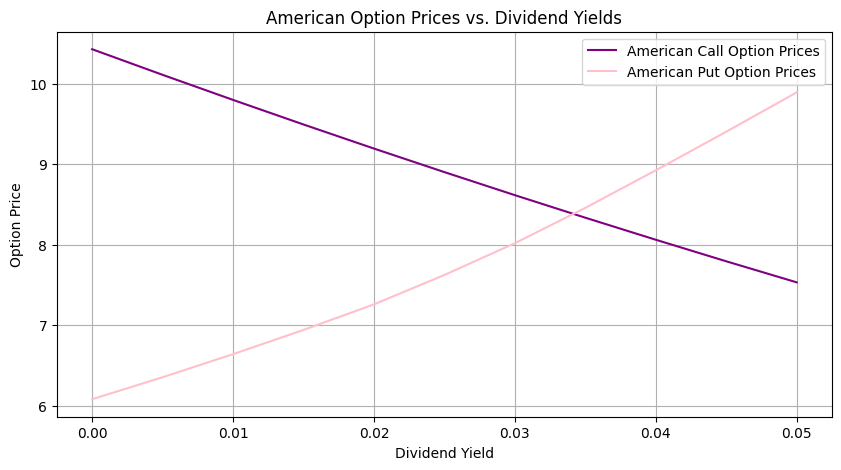

In [16]:
# Initialize a range of dividend yields from 0% to 5%
dividend_yields = np.linspace(0, 0.05, 11)

# Lists to store the prices
call_prices = []
put_prices = []

for dividend_yield in dividend_yields:
    # Initialize the model with varying dividend yields
    model_american = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2, dividend_yield=dividend_yield)
    
    # Calculate the American call option price
    call_price = model_american.binomial_tree_American_option_price(N=100, option_type='call')
    call_prices.append(call_price)
    
    # Calculate the American put option price
    put_price = model_american.binomial_tree_American_option_price(N=100, option_type='put')
    put_prices.append(put_price)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(dividend_yields, call_prices, label='American Call Option Prices', color="purple")
plt.plot(dividend_yields, put_prices, label='American Put Option Prices', color="pink")
plt.title('American Option Prices vs. Dividend Yields')
plt.xlabel('Dividend Yield')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

The figure depicts the relationship between dividend yields and American option prices. As the dividend yield increases, the price of American call options decreases, which is typical because higher dividends make holding the underlying less attractive. Conversely, the price of American put options increases with higher dividend yields, as higher dividends can decrease the underlying stock price, making puts more valuable.

## Conclusion

In conclusion, this model project delved into the pricing of options, initially focusing on European options with an analytical solution derived from the Black-Scholes model. Subsequently, it extended to incorporate a binomial tree, providing a numerical solution for European options. Both approaches yielded comparable results.

Moreover, the analysis encompassed variations in strike prices and volatility. Higher strike prices were associated with elevated put prices and diminished call prices. Additionally, increased volatility augmented both option prices, reflecting the heightened potential for larger payoffs.

Expanding the analysis, the project explored American options, where numerical solutions are essential due to the absence of analytical solutions. This necessity arises from the requirement for an optimal stopping strategy, given the option's exercisability at any point until maturity.

Finally, dividends were briefly introduced to illustrate their impact on option pricing in real-world scenarios with diverse dividend payment structures. This examination provided insights into how option prices are influenced by varying dividend distributions.